In [25]:
# !which python
# !python --version
# !pip install numpy pandas matplotlib rasterio

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

In [27]:
# red_band file for Oahu, Lanai, and Kaho'olawe
with rasterio.open("../data/red_band.tif") as red_src:
    red = red_src.read(1).astype("float32")

# nir_band file for Oahu, Lanai, and Kaho'olawe
with rasterio.open("../data/nir_band.tif") as nir_src:
    nir = nir_src.read(1).astype("float32")

# make sure both files are the same shape
print(red.shape, nir.shape)

(7711, 7561) (7711, 7561)


In [28]:
# calculate ndvi
# 1e-6 is tiny number added to avoid division by zero errors
ndvi = (nir - red) / (nir + red + 1e-6)

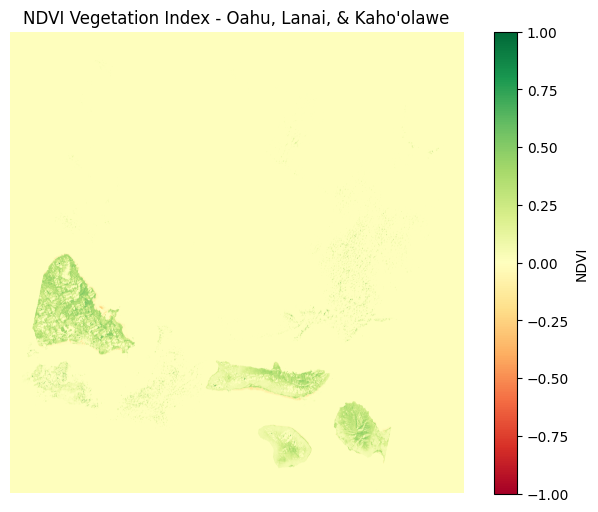

In [29]:
# Plotting the NDVI Map for Oahu, Lanai, and Kaho'olawe
plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI Vegetation Index - Oahu, Lanai, & Kaho'olawe")
plt.axis("off")
plt.savefig("../outputs/Oahu,Lanai,Kaho'olawe_ndvi_map.png", dpi=300)#save plot as file
plt.show()
# saving plot


(7851, 7701) (7851, 7701)


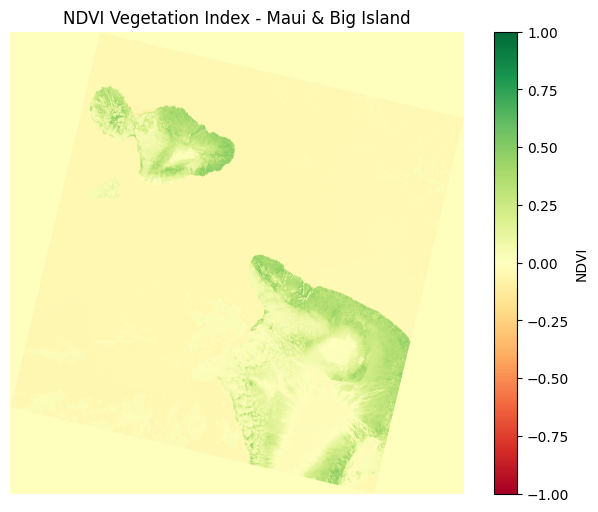

In [30]:
# red_band file for maui and main island
with rasterio.open("../data/red_band1.tif") as red_src:
    red1 = red_src.read(1).astype("float32")

# nir_band file for maui and main island
with rasterio.open("../data/nir_band1.tif") as nir_src:
    nir1 = nir_src.read(1).astype("float32")

# make sure both files are the same shape
print(red1.shape, nir1.shape)

# calculate ndvi
# 1e-6 is tiny number added to avoid division by zero errors
ndvi1 = (nir1 - red1) / (nir1 + red1 + 1e-6)

# Plotting the NDVI Map for maui and main island
plt.figure(figsize=(8, 6))
plt.imshow(ndvi1, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI Vegetation Index - Maui & Big Island")
plt.axis("off")
plt.savefig("../outputs/Maui,Big-Island_ndvi_map.png", dpi=300)#save plot as file
plt.show()

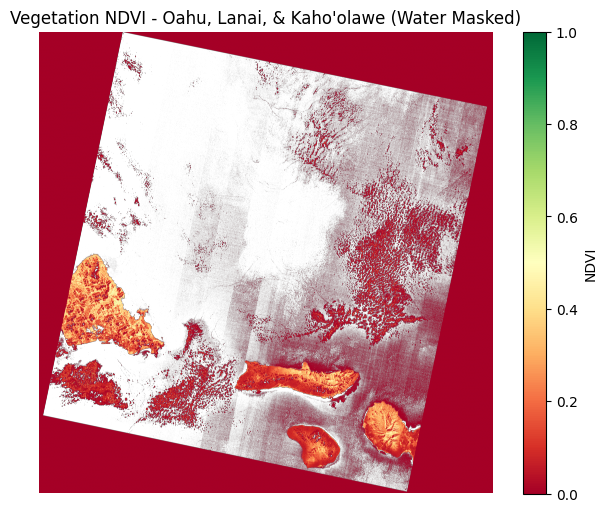

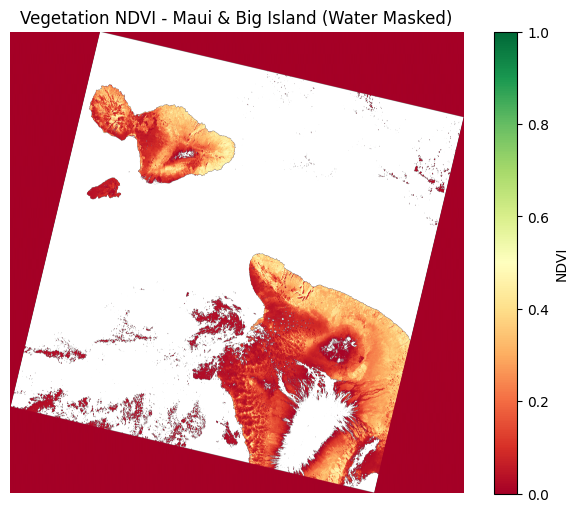

In [31]:
# water usually gives ndvi < 0 
# so replotting but masking water
# For both plots you can now see clouds above water affecting ndvi
ndvi_masked = np.where(ndvi < 0, np.nan, ndvi)
plt.figure(figsize=(8,6))
plt.imshow(ndvi_masked, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar(label="NDVI")
plt.title("Vegetation NDVI - Oahu, Lanai, & Kaho'olawe (Water Masked)")
plt.axis("off")
plt.savefig("../outputs/Oahu,Lanai,Kaho'olawe_ndvi_mask_map.png", dpi=300)#save plot as file
plt.show()
ndvi_masked = np.where(ndvi1 < 0, np.nan, ndvi1)
plt.figure(figsize=(8,6))
plt.imshow(ndvi_masked, cmap="RdYlGn", vmin=0, vmax=1)
plt.colorbar(label="NDVI")
plt.title("Vegetation NDVI - Maui & Big Island (Water Masked)")
plt.axis("off")
plt.savefig("../outputs/Maui,Big-Island_ndvi_mask_map.png", dpi=300)#save plot as file
plt.show()

In [35]:
# made a dataframe and put all land ndvi values in a column called 'ndvi'
# water gives ndvi < 0
ndvi_flat = ndvi.flatten()
ndvi1_flat = ndvi1.flatten()
df = pd.DataFrame({"ndvi": ndvi_flat})
df1 = pd.DataFrame({"ndvi1": ndvi1_flat})
df = df[(df["ndvi"] >= 0) & (df["ndvi"] <= 1)]
df1 = df1[(df1["ndvi1"] >= 0) & (df1["ndvi1"] <= 1)]

# summary of ndvi values
df.describe()
df1.describe()

,ndvi1
count,2.924962e+07
mean,5.899636e-02
std,1.130987e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.822919e-02
max,1.000000e+00


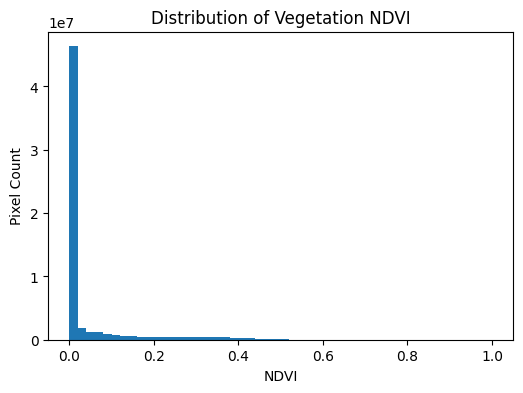

In [37]:
# Histogram to show distrubition of ndvi values on the Hawaiian islands
all_ndvi = np.concatenate((df['ndvi'], df1['ndvi1']))
plt.figure(figsize=(6,4))
plt.hist(all_ndvi, bins=50)
plt.xlabel("NDVI")
plt.ylabel("Pixel Count")
plt.title("Distribution of Vegetation NDVI")
plt.savefig("../outputs/NDVI-Distributiontesting.png", dpi=300)#save plot as file
plt.show()

In [ ]:
# saved ndvi values data to a csv file
df.to_csv("../outputs/hawaii_ndvi_values.csv", index=False)
df1.to_csv